In [9]:
import os
import sys
current_dir = os.getcwd()
base_dir = os.path.dirname(current_dir)

sys.path.append(base_dir)

In [10]:
import pandas as pd
import numpy as np
from utilities import featurization as fzn
import os
from sklearn.preprocessing import MinMaxScaler

data_dir = os.path.join(base_dir, 'data', 'preprocessed_dataset', '5fold_cv')

#read dataset
train = pd.read_csv(os.path.join(data_dir, '1', 'train.csv'))
val = pd.read_csv(os.path.join(data_dir, '1', 'val.csv'))

train = pd.concat([train, val]).reset_index() #combine train and val
test = pd.read_csv(os.path.join(data_dir, '1', 'test.csv'))

all_data = pd.concat([train, test]).reset_index()

In [64]:
all_data.head()

level_0  index  Unnamed: 0                  formula_unedited  \
0        0    0.0         522          Fe0.19La2.95Li5.57Zr2O12   
1        1    1.0          47  0.9(0.6Li2S-0.4SiS2)- 0.1Li4SiO4   
2        2    2.0         588             Li5.5Ba0.5La2.5Ta2O12   
3        3    3.0          19             0.63(Li2S) 0.37(GeS2)   
4        4    4.0         891         0.28SiS2-0.42Li2S-0.30LiI   

                    formula  space group    target  
0  Fe0.19La2.95Li5.57Zr2O12        220.0 -2.860121  
1      Li1.48S1.34Si0.5O0.4          NaN -3.360852  
2     Li5.5Ba0.5La2.5Ta2O12        230.0 -4.869666  
3         Li1.26S1.37Ge0.37          NaN -3.823909  
4     I0.3Li1.14S0.98Si0.28          NaN -2.744727

In [65]:
print(f'Total data: {len(all_data)}')

Total data: 1015


<AxesSubplot:>

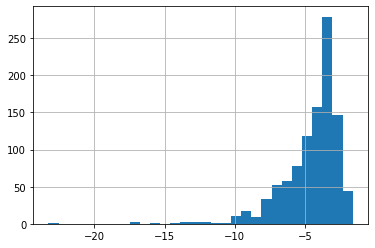

In [66]:
all_data['target'].hist(bins=30)

In [67]:
print('Number of data labeled with space group: {}'.format(len(all_data[~all_data['space group'].isnull()])))

Number of data labeled with space group: 555


In [68]:
print('Number of data per space group:')
all_data['space group'].value_counts().head()

Number of data per space group:


230.0    93
167.0    91
216.0    56
62.0     50
137.0    42
Name: space group, dtype: int64

In [69]:
list_space_group = [230, 167, 216, 137, 62, 221]
space_groups = [str(int(sg)) if sg in list_space_group else 'Other' for sg in train['space group']]

In [70]:
X_train, y_train, formulae_train = fzn.apply_scheme(train['formula'], list(train['target']))
X_test, y_test, formulae_test = fzn.apply_scheme(test['formula'], list(test['target']))
columns = X_train.columns

(812, 159)
(203, 159)


In [71]:
X_train.head()

avg_valence_p  avg_heat_atomization(kJ/mol)  avg_Atomic_Radius  \
0       2.113606                    283.136944           1.111000   
1       2.139785                    252.080645           1.182204   
2       2.133333                    292.666667           1.114889   
3       2.073333                    241.526667           1.257433   
4       2.214815                    228.007407           1.267407   

   avg_ionic_radius  avg_Pauling_Electronegativity  avg_Density_(g/mL)  \
0          1.074196                       2.333391            1.571888   
1          1.149462                       1.944516            1.275003   
2          1.067778                       2.349556            2.370163   
3          1.219833                       1.837700            1.829493   
4          1.244815                       1.842815            1.770007   

   avg_Zunger_radii_sum  avg_valence_f  avg_Melting_point_(K)  \
0              1.307116       0.000000             497.466821   
1              1.277634       0.000000             551.626344   
2              1.307378       1.244444             585.436667   
3              1.370933       0.000000             517.318000   
4              1.402407       0.000000             549.136667   

   avg_outer_shell_electrons  ...  range_number_of_valence_electrons  \
0                   3.868340  ...                                7.0   
1                   3.741935  ...                                5.0   
2                   3.888889  ...                                5.0   
3                   3.653333  ...                                5.0   
4                   3.792593  ...                                6.0   

   range_Atomic_Weight  range_Number_of_unfilled_s_valence_electrons  \
0            131.96450                                           1.0   
1             25.12500                                           1.0   
2            174.00690                                           1.0   
3             65.66900                                           1.0   
4            119.96347                                           1.0   

   range_heat_of_vaporization_(kJ/mol)_  range_heat_of_fusion_(kJ/mol)_  \
0                              578.5901                        16.67741   
1                              380.8101                        50.32741   
2                              739.5901                        31.37741   
3                              321.1000                        35.22250   
4                              374.4200                        48.83250   

   range_Covalent_Radius  range_valence_s  ratio_cation  ratio_anion  \
0                   0.96              1.0      0.471598     0.528402   
1                   0.61              1.0      0.532258     0.467742   
2                   1.25              1.0      0.466667     0.533333   
3                   0.32              1.0      0.543333     0.456667   
4                   0.32              1.0      0.525926     0.474074   

   ratio_cation_to_anion  
0               0.892500  
1               1.137931  
2               0.875000  
3               1.189781  
4               1.109375  

[5 rows x 159 columns]

In [72]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

target_names = ['high conductivity' if t>-4 else 'low conductivity' for t in y_train]
target_ids = [1 if t>-4 else 0 for t in y_train]
# target_ids = [2 if t>-3.5 else (1 if t>-5 and t<=-3.5 else 0) for t in y_train]

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.


In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X_train)
X_pca = pca.transform(X_train)

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.


In [74]:
df_pca = pd.DataFrame(X_pca[:,[0,1]], columns=['PCA1', 'PCA2'])
df_pca['label'] = target_names
df_pca['ionic conductivity'] = y_train
df_pca['formula'] = formulae_train
df_pca['space group'] = space_groups
df_pca = df_pca[df_pca['ionic conductivity']>-7]

In [75]:
# df_pca.to_csv('D:/RESEARCH/230313 Machine Learning for SSE/FINAL_CODE/results/VISUALIZATION/PCA/magpiev2.csv')

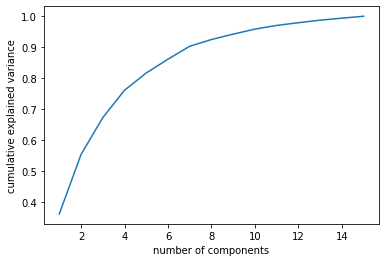

In [76]:
import matplotlib.pyplot as plt

perc_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(perc_var_explained) 
plt.plot([x+1 for x in range(len(cum_var_explained))], cum_var_explained)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [77]:
cum_var_explained

array([0.36235367, 0.55404051, 0.67285869, 0.76123728, 0.81695401,
       0.86151704, 0.90318134, 0.92496249, 0.94234309, 0.95849658,
       0.97041616, 0.97914815, 0.98730867, 0.99385383, 1.        ])

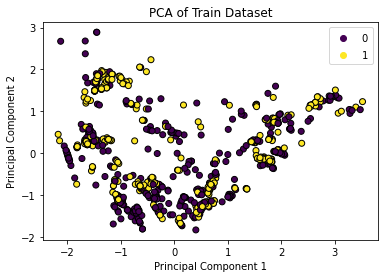

In [78]:
import matplotlib.pyplot as plt

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_ids, cmap='viridis', edgecolor='k')
plt.title('PCA of Train Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

In [79]:
import plotly.express as px

fig = px.scatter(df_pca, x='PCA1', y='PCA2', color='ionic conductivity', color_continuous_scale='rainbow',opacity=1,
                 title='PCA', hover_data=['formula', 'space group', 'ionic conductivity'])
fig.show()

In [80]:
import plotly.express as px

fig = px.scatter(df_pca, x='PCA1', y='PCA2', symbol='space group', color='space group',opacity=1,
                 title='PCA', hover_data=['formula', 'space group', 'ionic conductivity'], labels={'space group':'Space Group'},
                color_discrete_map={ # replaces default color mapping by value
                "Other": "rgb(203,213,232)"
            })
fig.show()

[230, 167, 216, 137, 62, 221]

[230, 167, 216, 137, 62, 221]

## SHAP Value

In [81]:
import shap  # package used to calculate Shap values
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# model = RandomForestRegressor(random_state = 1, n_estimators= 300, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 30, bootstrap= False)
model = XGBRegressor(random_state = 0, n_estimators= 300, max_depth=7, learning_rate=0.1, colsample_bytree=0.6)

model.fit(X_train, y_train)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


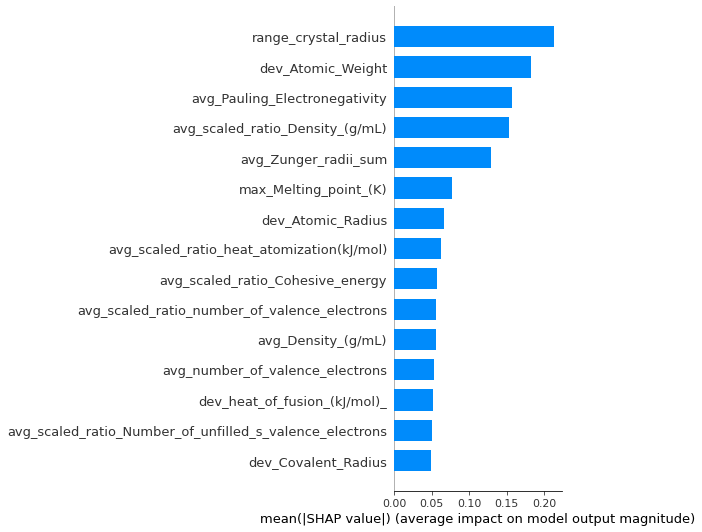

In [82]:
shap.summary_plot(shap_values, X_test, max_display=15, plot_type='bar')

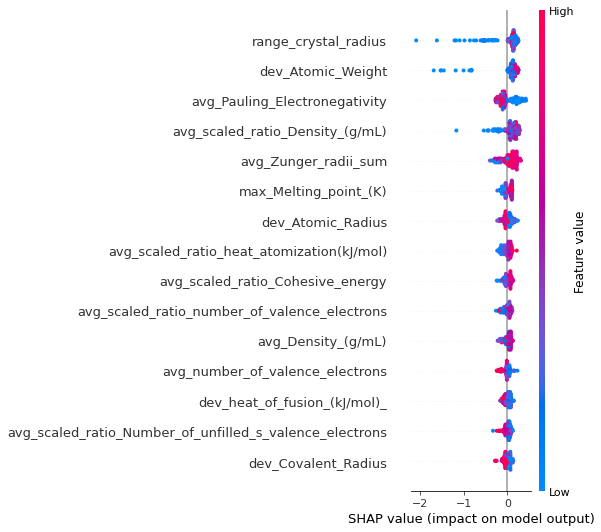

In [83]:
shap.summary_plot(shap_values, X_test, max_display=15)

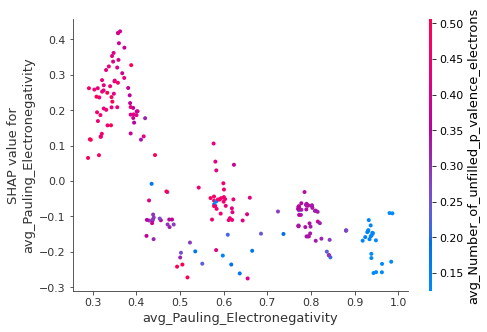

In [84]:
shap.dependence_plot('avg_Pauling_Electronegativity', shap_values, X_test)

In [85]:
formulae_test

['Li0.8I0.8Al0.4O0.6000000000000001',
 'Li2S9P4',
 'Li6ZnO4',
 'La0.56Sr0.1Li0.1TiO3',
 'La0.56Li0.36Ti0.95Al0.05O3',
 'Li3.855Sn0.855As0.145S4',
 'Li1.2Si0.4S0.8O2.03P0.8',
 'Li1.351S1.33Si0.35P0.03O0.12',
 'Li1.2Ti1.8Al0.2P3O12',
 'Li1.4Al0.4Ti1.6P3O12',
 'Li6P0.64Ge0.36S5I',
 'LiMgSO4F',
 'Li1.3Al0.2Sc0.1Ti1.7P3O12',
 'Li3.84Sn0.84As0.16S4',
 'Li6.65La3Zr1.65Ta0.35O12',
 'SiS3Li2',
 'Li6.4La3Zr1.4Ta0.6O12',
 'La0.56Li0.33TiO3',
 'B0.627S1.611Li1.39I0.05',
 'La0.41Sr0.25Li0.25TiO3',
 'La0.55Li0.36Ti0.992Al0.008O3',
 'Li51.2Al1.6La24Zr16O96',
 'Li6.125P0.875Si0.125S5Br',
 'Li1.2In0.2Ti1.8P3O12',
 'Li1.25Al0.25Zr1.5P3O12',
 'Li7La3Zr2O12',
 'Li6.75La3Zr1.75Ta0.25O12',
 'Li1.06Si0.47S0.94O2.376P0.94',
 'Li1.5O0.4P0.5S1.6',
 'Li1.4000000000000001O0.65P0.6S1.55',
 'La0.516Li0.15Ti0.85Al0.15O3',
 'Li1.6O0.35P0.4S1.45',
 'Li1.65O0.525S1.55P0.5',
 'Li3.4PO3.1N0.9',
 'LiYB4H16',
 'Pr0.56Li0.34TiO3.01',
 'Li3.2Si0.2P0.8S4',
 'Li3InBr4Cl2',
 'Li0.22La0.6TiO3',
 'Li1.6Mg1.2Cl4',
 'Li5.3La3Ta1.85

In [86]:
shap.initjs()
n_row = formulae_test.index('Li1.3Al0.2Sc0.1Ti1.7P3O12')
print(formulae_test[n_row])
# print(y_test[n_row])
shap.force_plot(explainer.expected_value, shap_values[n_row], X_test.iloc[n_row])

Li1.3Al0.2Sc0.1Ti1.7P3O12
